# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

In [3]:
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

11


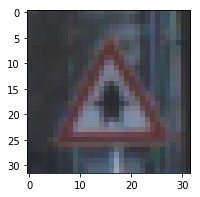

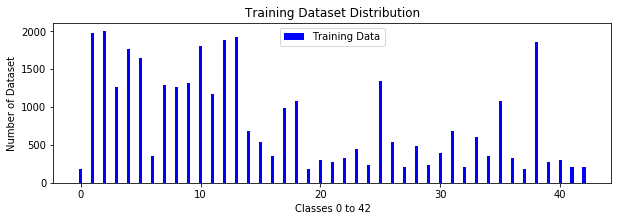

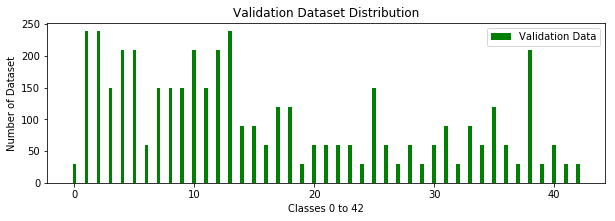

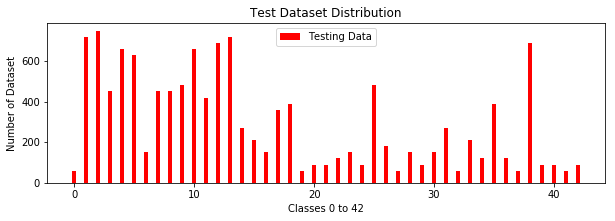

In [77]:
import random
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

#To show random dataset image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[index])

#Bar charts for training, validation and test dataset
train_dataset = np.unique(y_train, return_counts = True)
validation_dataset = np.unique(y_validation, return_counts = True)
test_dataset = np.unique(y_test, return_counts = True)
bar_width = 0.3

figure = plt.figure(figsize = (10,10))
F1 = figure.add_subplot(311)
train_dataset_plot = F1.bar(train_dataset[0], train_dataset[1], bar_width, color ='b')
F1.legend([train_dataset_plot], ['Training Data'])
F1.set_title('Training Dataset Distribution')
F1.set_ylabel('Number of Dataset')
F1.set_xlabel('Classes 0 to 42')
plt.show()

figure = plt.figure(figsize = (10,10))
F2 = figure.add_subplot(312)
validation_dataset_plot = F2.bar(validation_dataset[0], validation_dataset[1], bar_width, color ='g')
F2.legend([validation_dataset_plot],['Validation Data'])
F2.set_title('Validation Dataset Distribution')
F2.set_ylabel('Number of Dataset')
F2.set_xlabel('Classes 0 to 42')
plt.show()

figure = plt.figure(figsize = (10,10))
F3 = figure.add_subplot(313)
test_dataset_plot = F3.bar(test_dataset[0], test_dataset[1], bar_width, color ='r')
F3.legend([test_dataset_plot],['Testing Data'])
F3.set_title('Test Dataset Distribution')
F3.set_ylabel('Number of Dataset')
F3.set_xlabel('Classes 0 to 42')
plt.show()

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (Normalization)

Old Mean of Training Dataset =  82.6775890369964
Old Mean of Validation Dataset =  83.55642737563775
Old Mean of Test Dataset =  82.14846036120183
New Mean of Training Dataset =  0.35938067148861497
New Mean of Validation Dataset =  0.3621378113745498
New Mean of Test Dataset =  0.3577206599567125
The Dataset is Normalized between 0 - 1


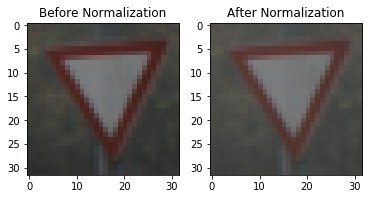

In [5]:
from sklearn.utils import shuffle

# Shuffle the Dataset
X_train, y_train = shuffle(X_train, y_train)

# Old Mean
print("Old Mean of Training Dataset = ", np.mean(X_train))
print("Old Mean of Validation Dataset = ", np.mean(X_validation))
print("Old Mean of Test Dataset = ", np.mean(X_test))

plt.subplot(1,2,1)
plt.imshow(X_train[index])
plt.title('Before Normalization')

def normalization(x):
    a = 0.1
    b = 0.9
    x_min = 0
    x_max = 255
    
    return a + (x - x_min) * (b - a) / (x_max - x_min)

X_train = normalization(X_train)
X_valid = normalization(X_validation)
X_test = normalization(X_test)

# Normalized
print("New Mean of Training Dataset = ", np.mean(X_train))
print("New Mean of Validation Dataset = ", np.mean(X_valid))
print("New Mean of Test Dataset = ", np.mean(X_test))


plt.subplot(1,2,2)
plt.imshow(X_train[index])
plt.title('After Normalization')

print('The Dataset is Normalized between 0 - 1')

### Model Architecture - Similar to DAVE-2 CNN developed by NVIDIA

In [6]:
# Image
# Convolution Layer 1 - 5x5 & 1 stride
# Convolution Layer 2 - 5x5 & 1 stride
# Convolution Layer 3 - 5x5 & 2 stride
# Convolution Layer 4 - 3x3 & 2 stride
# Convolution Layer 5 - 3x3 & 2 stride
# Fully Connected Layer 6
# Dropout
# Fully Connected Layer 7
# Dropout
# Classifier Layer 8

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def TSC_CNN(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
    'wc1': tf.Variable(tf.random_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.random_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.random_normal(shape = (5, 5, 16, 36), mean = mu, stddev = sigma)),
    'wc4': tf.Variable(tf.random_normal(shape = (3, 3, 36, 48), mean = mu, stddev = sigma)),
    'wc5': tf.Variable(tf.random_normal(shape = (3, 3, 48, 64), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.random_normal(shape = (64, 120), mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.random_normal(shape = (120, 84), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.random_normal(shape = (84, 43), mean = mu, stddev = sigma))}

    biases = {
    'bc1': tf.Variable(tf.random_normal([6])),
    'bc2': tf.Variable(tf.random_normal([16])),
    'bc3': tf.Variable(tf.random_normal([36])),
    'bc4': tf.Variable(tf.random_normal([48])),
    'bc5': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([120])),
    'bd2': tf.Variable(tf.random_normal([84])),
    'out': tf.Variable(tf.random_normal([43]))}
    
   
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    Cov1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    Cov1 = tf.nn.bias_add(Cov1, biases['bc1'])

    # Activation.
    Cov1 = tf.nn.relu(Cov1)

    # Layer 2: Convolutional Input = 28x28x6 Output = 24x24x16.
    Cov2 = tf.nn.conv2d(Cov1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    Cov2 = tf.nn.bias_add(Cov2, biases['bc2'])
    
    # Activation.
    Cov2 = tf.nn.relu(Cov2)
   
    # Layer 3: Convolutional. Input = 24x24x16 Output = 10x10x36.
    Cov3 = tf.nn.conv2d(Cov2, weights['wc3'], strides=[1, 2, 2, 1], padding='VALID')
    Cov3 = tf.nn.bias_add(Cov3, biases['bc3'])
    
    # Activation.
    Cov3 = tf.nn.relu(Cov3)
    
    # Layer 4: Convolutional. Input = 10x10x36 Output = 4x4x48. 
    Cov4 = tf.nn.conv2d(Cov3, weights['wc4'], strides=[1, 2, 2, 1], padding='VALID')
    Cov4 = tf.nn.bias_add(Cov4, biases['bc4'])
    
    # Activation.
    Cov4 = tf.nn.relu(Cov4)
         
    # Layer 5: Convolutional Input = 4x4x48 Output = 1x1x64.
    Cov5 = tf.nn.conv2d(Cov4, weights['wc5'], strides=[1, 2, 2, 1], padding='VALID')
    Cov5 = tf.nn.bias_add(Cov5, biases['bc5'])
    
    # Activation.
    Cov5 = tf.nn.relu(Cov5)


    # Flatten. Input = 1x1x64. Output = 64. 
    fc1 = flatten(Cov5)
    
       
    # Layer 6: Fully Connected. Input = 64. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 7: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 8: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    
    return logits

### Model Evaluation

In [9]:
EPOCHS = 15
BATCH_SIZE = 20

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# Exponentially reducing learn_rate used while defining in session
rate = tf.placeholder(tf.float32)

logits = TSC_CNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75, rate: 0.001})
            
        validation_accuracy = evaluate(X_valid, y_validation)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.855
Training Accuracy = 0.884

EPOCH 2 ...
Validation Accuracy = 0.915
Training Accuracy = 0.947

EPOCH 3 ...
Validation Accuracy = 0.920
Training Accuracy = 0.961

EPOCH 4 ...
Validation Accuracy = 0.940
Training Accuracy = 0.979

EPOCH 5 ...
Validation Accuracy = 0.924
Training Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.943
Training Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.952
Training Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.946
Training Accuracy = 0.989

EPOCH 9 ...
Validation Accuracy = 0.938
Training Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.923
Training Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.939
Training Accuracy = 0.987

EPOCH 12 ...
Validation Accuracy = 0.946
Training Accuracy = 0.989

EPOCH 13 ...
Validation Accuracy = 0.941
Training Accuracy = 0.982

EPOCH 14 ...
Validation Accuracy = 0.954
Training Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.945
Tra

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

C:\Users\Saumya Trivedi\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\Saumya Trivedi\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
C:\Users\Saumya Trivedi\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\Saumya Trivedi\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``s

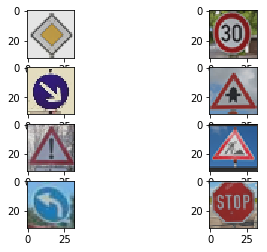

In [78]:
import cv2
from scipy import misc
import matplotlib.image as mpimg 
image = np.zeros([8,32,32,3], dtype = 'uint8')

image[0] = misc.imresize(cv2.imread('./New_Traffic_Signs/1.png'),(32,32,3))[...,::-1]
image[1] = misc.imresize(cv2.imread('./New_Traffic_Signs/2.png'),(32,32,3))[...,::-1]
image[2] = misc.imresize(cv2.imread('./New_Traffic_Signs/3.png'),(32,32,3))[...,::-1]
image[3] = misc.imresize(cv2.imread('./New_Traffic_Signs/4.png'),(32,32,3))[...,::-1]
image[4] = misc.imresize(cv2.imread('./New_Traffic_Signs/5.png'),(32,32,3))[...,::-1]
image[5] = misc.imresize(cv2.imread('./New_Traffic_Signs/6.png'),(32,32,3))[...,::-1]
image[6] = misc.imresize(cv2.imread('./New_Traffic_Signs/7.png'),(32,32,3))[...,::-1]
image[7] = misc.imresize(cv2.imread('./New_Traffic_Signs/8.png'),(32,32,3))[...,::-1]

image = normalization(image)


webtest_input = image
webtest_label = [12,1,38,11,18,25,34,14]
plt.figure

for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.imshow(image[i])

### Analyze Performance

In [79]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(webtest_input, webtest_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [80]:
softmax_probabilities = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_prob = sess.run(softmax_probabilities, feed_dict={x: webtest_input, keep_prob: 1})
    print(sess.run(tf.nn.top_k(tf.constant(softmax_prob), k=5)))

INFO:tensorflow:Restoring parameters from .\lenet
TopKV2(values=array([[1.0000000e+00, 1.5485689e-13, 5.8578554e-16, 4.3520264e-16,
        2.0354787e-16],
       [9.9976093e-01, 1.1662288e-04, 9.2008959e-05, 2.5759273e-05,
        2.7752280e-06],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 3.7383113e-15, 7.1244391e-16, 5.2440964e-18,
        2.5297344e-18],
       [9.9996245e-01, 3.7460020e-05, 1.3890921e-07, 4.1314209e-08,
        9.5939710e-09],
       [8.3240169e-01, 4.0938910e-02, 3.5930134e-02, 3.5899855e-02,
        1.6871557e-02],
       [9.9999988e-01, 1.6494481e-07, 2.0051862e-09, 8.7116023e-11,
        8.1651456e-11],
       [5.4434371e-01, 2.7733627e-01, 8.0962338e-02, 4.4163179e-02,
        3.7722092e-02]], dtype=float32), indices=array([[12, 40, 11, 13,  5],
       [ 1,  4,  0,  2,  5],
       [38,  0,  1,  2,  3],
       [11, 30, 23, 21, 27],
       [18, 26, 27, 20, 24],
       [25, 38, 13, 30, 26],
 

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")